# Content

    1. Problem Definition
    
    2. Getting Started - Load Libraries and Dataset
        2.1. Load Libraries
        2.2. Load Dataset
        
    3. Exploratory Data Analysis
        3.1. Descriptive Statistics
        3.2. Data Cleaning
        
    4. Data Visualization
        4.1. Distribution Analysis 
      
    5. Model Development and Evaluation
        5.1. Model Implementation
        5.2. Train and Evaluate Models
        5.3. Success Criteria and Model Evaluation
        5.4. Cross-validation
        5.5. Hyperparameter Tuning
        
    6. Results Analysis
        6.1. Model Comparison
        6.2. Visual Analysis
        6.3. Detailed Metrics
        6.4. Final Performance Visualization
       
    7. Conclusions
        
    9. References
   
        
# 1. Problem Definition


The objective of this project is to be able to predict the price of housing based on certain specific characteristics, such as whether the owner has been in the building for more or less than 5 years, the number of people who are in each building, it is considered that with this information it can be determined which areas of the perimeter are abandoned based on the year of construction and the number of renovations that have been made since the time the house was built. To do this, the regression algorithm will be used to determine how prices vary according to the parameters mentioned above. with this information, a percentage of money for contingencies that may arise over time could be contemplated. However, for this budget to be as tight as possible, it should be taken into account that it will vary depending on the location of the place, the size of the house, the number of people living in the place and the amount of remodeling that has been done or will be done over time. 



# 2. Getting Started - Load Libraries and Dataset

## 2.1.Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

## 2.2. Load Dataset

Due to the fact that the original csv file had some chinese characters we use latin1 file encoding rather than the default type.

In [2]:
data = pd.read_csv('new.csv', encoding="latin1")
data = data.sample(frac=0.2)

In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
6677,https://bj.lianjia.com/chengjiao/101092126603....,1.010000e+11,116.402217,39.884746,1.110000e+12,31/08/2016,119,45,430.0,84813,...,4.0,1975,3,2,0.333,0,0,0,10,98415.0
20305,https://bj.lianjia.com/chengjiao/101100313139....,1.010000e+11,116.479295,39.997662,1.110000e+12,12/08/2016,28,16,180.5,41305,...,1.0,2008,4,6,0.312,1,0,1,7,41980.0
22293,https://bj.lianjia.com/chengjiao/101100346058....,1.010000e+11,116.388821,39.846982,1.110000e+12,22/08/2016,30,161,248.0,40195,...,4.0,1996,3,2,0.333,0,1,1,2,50645.0
4193,https://bj.lianjia.com/chengjiao/101091936771....,1.010000e+11,116.432429,39.866533,1.110000e+12,18/07/2016,103,101,269.0,47865,...,4.0,1990,4,2,0.333,0,0,1,2,57161.0
6225,https://bj.lianjia.com/chengjiao/101092099595....,1.010000e+11,116.471931,40.008739,1.110000e+12,20/07/2016,82,34,440.0,53843,...,4.0,1998,3,2,0.500,0,1,1,7,57510.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5518 entries, 6677 to 4467
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  5518 non-null   object 
 1   id                   5518 non-null   float64
 2   Lng                  5518 non-null   float64
 3   Lat                  5518 non-null   float64
 4   Cid                  5518 non-null   float64
 5   tradeTime            5518 non-null   object 
 6   DOM                  5518 non-null   int64  
 7   followers            5518 non-null   int64  
 8   totalPrice           5518 non-null   float64
 9   price                5518 non-null   int64  
 10  square               5518 non-null   float64
 11  livingRoom           5518 non-null   int64  
 12  drawingRoom          5518 non-null   int64  
 13  kitchen              5518 non-null   int64  
 14  bathRoom             5518 non-null   int64  
 15  floor                5518 non-null   obj

In [5]:
data.shape

(5518, 26)

In [6]:
data.describe()

,id,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,livingRoom,...,bathRoom,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,5.518000e+03,5518.000000,5518.000000,5.518000e+03,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,...,5518.000000,5466.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5512.000000
mean,1.010000e+11,116.409842,39.948657,1.131002e+12,69.279268,33.712758,442.517706,53128.630845,86.322452,2.048387,...,1.217108,3.020124,3.318231,4.521928,0.382858,0.595687,0.540776,0.610185,6.653316,64599.105951
std,0.000000e+00,0.110077,0.096286,1.560110e+12,71.562940,45.124944,277.914790,21984.501723,43.046469,0.827969,...,0.490605,1.258078,0.912641,1.887580,0.187761,0.490803,0.498380,0.487752,2.734052,23470.109255
min,1.010000e+11,116.072514,39.632299,1.110000e+12,1.000000,0.000000,27.400000,6279.000000,16.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.014000,0.000000,0.000000,0.000000,1.000000,21888.000000
25%,1.010000e+11,116.343245,39.891716,1.110000e+12,21.000000,9.000000,270.000000,36347.000000,58.200000,1.000000,...,1.000000,1.000000,3.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46276.000000
50%,1.010000e+11,116.416156,39.934384,1.110000e+12,47.000000,21.000000,377.000000,48539.000000,75.780000,2.000000,...,1.000000,4.000000,4.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,59630.000000
75%,1.010000e+11,116.472175,40.004147,1.110000e+12,95.000000,42.000000,528.000000,66429.750000,101.295000,3.000000,...,1.000000,4.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,79080.250000
max,1.010000e+11,116.732378,40.251337,1.170000e+14,927.000000,906.000000,3480.000000,148338.000000,557.000000,8.000000,...,6.000000,4.000000,4.000000,6.000000,2.000000,1.000000,1.000000,1.000000,13.000000,183109.000000


# 3. Exploratory Data Analysis
## 3.1 Descriptive Statistics

Convert object columns to numeric:

In [7]:
data['tradeTime'] = data['tradeTime'].str.extract(r'(\d{4})', expand=False)
data['tradeTime'] = pd.to_numeric(data['tradeTime'], errors='coerce')

In [8]:
data['constructionTime'] = data['constructionTime'].str.extract(r'(\d{4})', expand=False)
data['constructionTime'] = pd.to_numeric(data['constructionTime'], errors='coerce')

In [9]:
data.head(10)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
6677,https://bj.lianjia.com/chengjiao/101092126603....,1.010000e+11,116.402217,39.884746,1.110000e+12,2016,119,45,430.0,84813,...,4.0,1975.0,3,2,0.333,0,0,0,10,98415.0
20305,https://bj.lianjia.com/chengjiao/101100313139....,1.010000e+11,116.479295,39.997662,1.110000e+12,2016,28,16,180.5,41305,...,1.0,2008.0,4,6,0.312,1,0,1,7,41980.0
22293,https://bj.lianjia.com/chengjiao/101100346058....,1.010000e+11,116.388821,39.846982,1.110000e+12,2016,30,161,248.0,40195,...,4.0,1996.0,3,2,0.333,0,1,1,2,50645.0
4193,https://bj.lianjia.com/chengjiao/101091936771....,1.010000e+11,116.432429,39.866533,1.110000e+12,2016,103,101,269.0,47865,...,4.0,1990.0,4,2,0.333,0,0,1,2,57161.0
6225,https://bj.lianjia.com/chengjiao/101092099595....,1.010000e+11,116.471931,40.008739,1.110000e+12,2016,82,34,440.0,53843,...,4.0,1998.0,3,2,0.500,0,1,1,7,57510.0
5600,https://bj.lianjia.com/chengjiao/101092050878....,1.010000e+11,116.360004,39.904980,1.110000e+12,2016,145,62,468.0,85076,...,1.0,1983.0,3,6,0.286,1,1,1,10,89752.0
18492,https://bj.lianjia.com/chengjiao/101100281409....,1.010000e+11,116.413068,39.819779,1.110000e+12,2016,30,44,130.0,30233,...,4.0,1995.0,3,2,0.333,0,1,0,2,47571.0
815,https://bj.lianjia.com/chengjiao/101091351584....,1.010000e+11,116.232119,40.223852,1.110000e+12,2016,189,52,140.0,25455,...,1.0,2009.0,4,6,0.143,1,1,1,6,41887.0
21303,https://bj.lianjia.com/chengjiao/101100328967....,1.010000e+11,116.689803,39.889508,1.110000e+12,2016,12,7,240.0,38741,...,4.0,2001.0,4,2,0.500,0,0,0,11,42490.0
3048,https://bj.lianjia.com/chengjiao/101091835772....,1.010000e+11,116.343400,40.083322,1.110000e+12,2016,92,24,425.0,32028,...,4.0,2003.0,3,4,0.500,0,1,1,6,41560.0


In [10]:
columns_to_convert = ['livingRoom', 'drawingRoom', 'bathRoom']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [11]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
6677,https://bj.lianjia.com/chengjiao/101092126603....,1.010000e+11,116.402217,39.884746,1.110000e+12,2016,119,45,430.0,84813,...,4.0,1975.0,3,2,0.333,0,0,0,10,98415.0
20305,https://bj.lianjia.com/chengjiao/101100313139....,1.010000e+11,116.479295,39.997662,1.110000e+12,2016,28,16,180.5,41305,...,1.0,2008.0,4,6,0.312,1,0,1,7,41980.0
22293,https://bj.lianjia.com/chengjiao/101100346058....,1.010000e+11,116.388821,39.846982,1.110000e+12,2016,30,161,248.0,40195,...,4.0,1996.0,3,2,0.333,0,1,1,2,50645.0
4193,https://bj.lianjia.com/chengjiao/101091936771....,1.010000e+11,116.432429,39.866533,1.110000e+12,2016,103,101,269.0,47865,...,4.0,1990.0,4,2,0.333,0,0,1,2,57161.0
6225,https://bj.lianjia.com/chengjiao/101092099595....,1.010000e+11,116.471931,40.008739,1.110000e+12,2016,82,34,440.0,53843,...,4.0,1998.0,3,2,0.500,0,1,1,7,57510.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5518 entries, 6677 to 4467
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  5518 non-null   object 
 1   id                   5518 non-null   float64
 2   Lng                  5518 non-null   float64
 3   Lat                  5518 non-null   float64
 4   Cid                  5518 non-null   float64
 5   tradeTime            5518 non-null   int64  
 6   DOM                  5518 non-null   int64  
 7   followers            5518 non-null   int64  
 8   totalPrice           5518 non-null   float64
 9   price                5518 non-null   int64  
 10  square               5518 non-null   float64
 11  livingRoom           5518 non-null   int64  
 12  drawingRoom          5518 non-null   int64  
 13  kitchen              5518 non-null   int64  
 14  bathRoom             5518 non-null   int64  
 15  floor                5518 non-null   obj

## 3.2 Data Cleaning

Since these variables do not seem to influence my target variable, they are removed to simplify the analysis, since I consider that it does not contain relevant information.

In [13]:
data.drop(['url', 'id', 'Cid', 'floor'], axis=1, inplace=True, errors='ignore')

Dropping rows with missed prices (target variable)

In [14]:
data.dropna(subset=['price'], inplace=True)

These missing values are placed so that they can later be recognized as missing values and treated appropriately in the resulting DataFrame.

In [15]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

  # Plot missing values

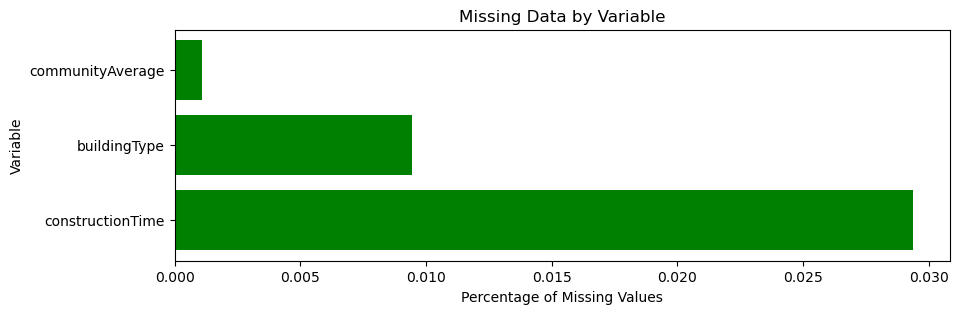

In [16]:
plt.figure(figsize=(10, 3))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

I want to better understand the distribution of the data in the DOM,buildingType,communityAverage and constructionTime columns,
identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, 
and check if the standard deviation is high.

In [17]:
data[['DOM','constructionTime','buildingType', 'communityAverage']].describe() 

,DOM,constructionTime,buildingType,communityAverage
count,5518.000000,5356.000000,5466.000000,5512.000000
mean,69.279268,1999.888536,3.020124,64599.105951
std,71.562940,8.888546,1.258078,23470.109255
min,1.000000,1954.000000,1.000000,21888.000000
25%,21.000000,1995.000000,1.000000,46276.000000
50%,47.000000,2002.000000,4.000000,59630.000000
75%,95.000000,2006.000000,4.000000,79080.250000
max,927.000000,2016.000000,4.000000,183109.000000


# 4. Data Visualization
## 4.1. Distribution Analysis

Depending on the nature of the data and the context of the problem, an imputation method is chosen for each column

In [18]:
data['DOM'].fillna(data['DOM'].mean(), inplace=True)
data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)
data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)
data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)
data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)
data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)
data['subway'].fillna(data['subway'].mode()[0], inplace=True)
data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)
data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)
data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

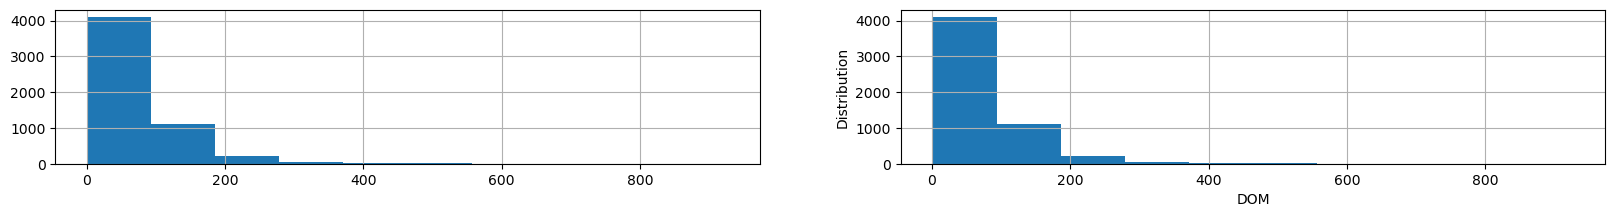

In [19]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['DOM'].hist(ax=ax1)
plt.xlabel('DOM')
plt.ylabel('Distribution')

data['DOM'].fillna(data['DOM'].mean(), inplace=True)

data['DOM'].hist(ax=ax2)

plt.show()

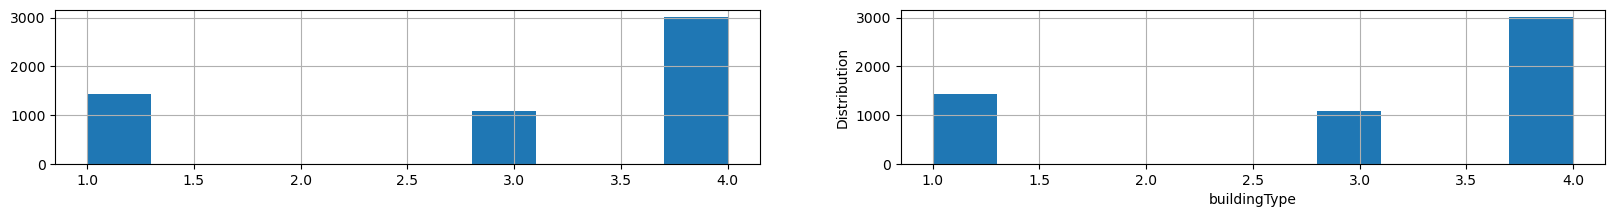

In [20]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['buildingType'].hist(ax=ax1)
plt.xlabel('buildingType')
plt.ylabel('Distribution')

data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)

data['buildingType'].hist(ax=ax2)

plt.show()

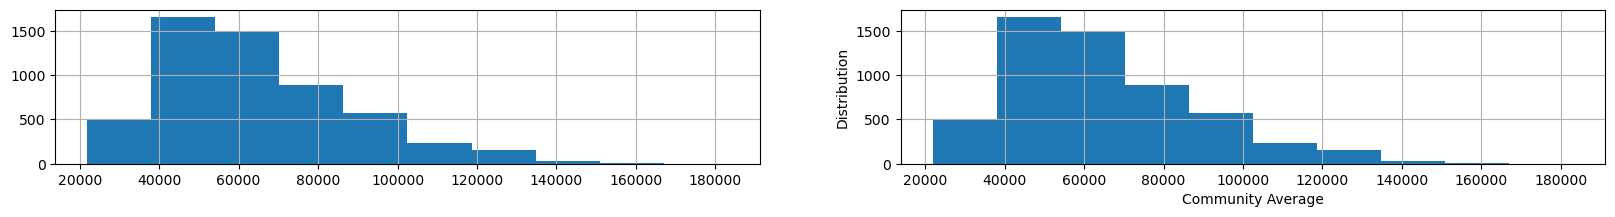

In [21]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['communityAverage'].hist(ax=ax1)
plt.xlabel('Community Average')
plt.ylabel('Distribution')

data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)

data['communityAverage'].hist(ax=ax2)

plt.show()

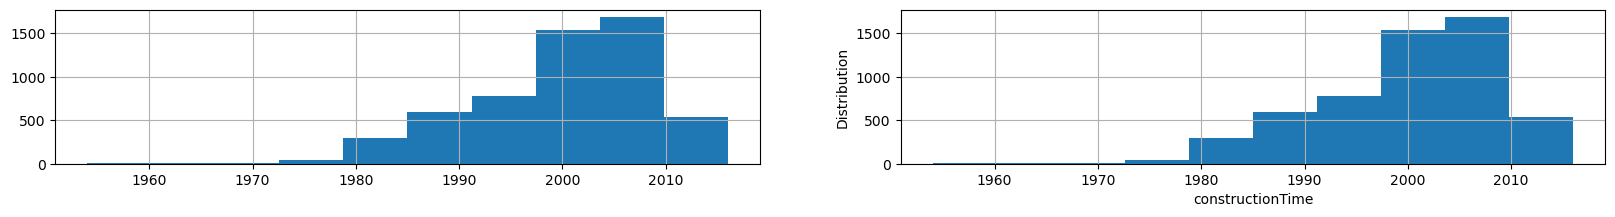

In [22]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['constructionTime'].hist(ax=ax1)
plt.xlabel('constructionTime')
plt.ylabel('Distribution')

data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)

data['constructionTime'].hist(ax=ax2)

plt.show()

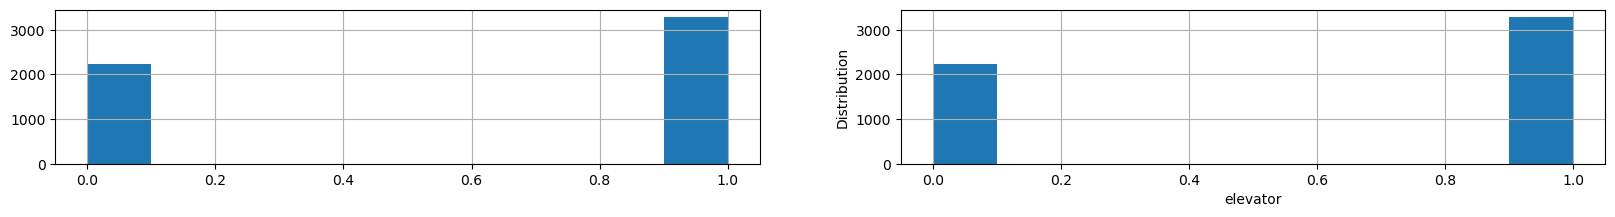

In [23]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['elevator'].hist(ax=ax1)
plt.xlabel('elevator')
plt.ylabel('Distribution')

data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)

data['elevator'].hist(ax=ax2)

plt.show()

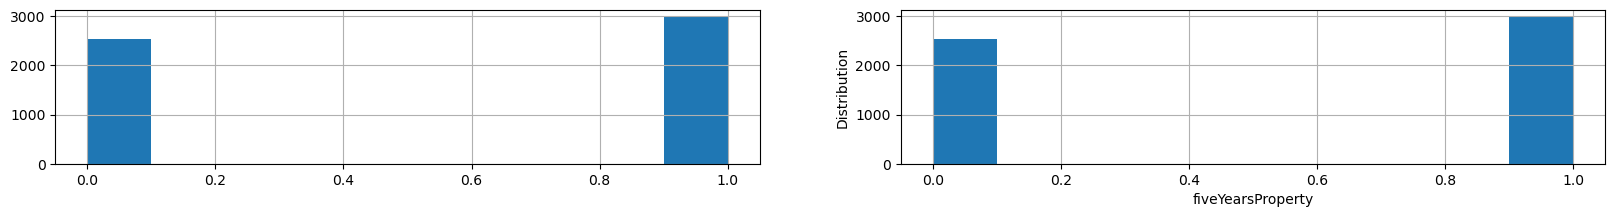

In [24]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['fiveYearsProperty'].hist(ax=ax1)
plt.xlabel('fiveYearsProperty')
plt.ylabel('Distribution')

data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)

data['fiveYearsProperty'].hist(ax=ax2)

plt.show()

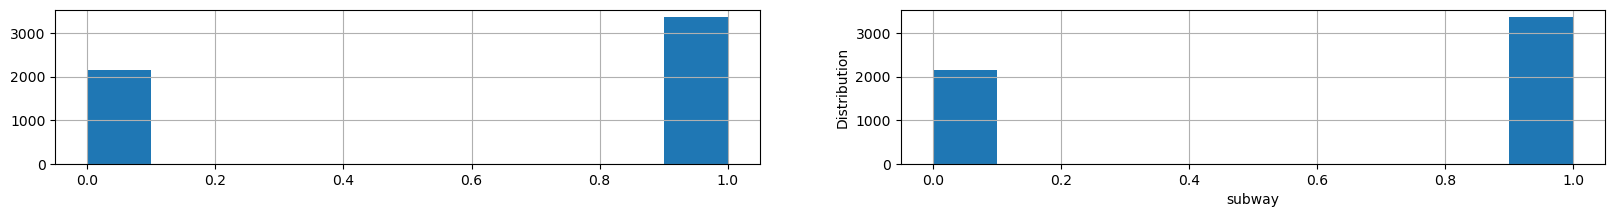

In [25]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['subway'].hist(ax=ax1)
plt.xlabel('subway')
plt.ylabel('Distribution')

data['subway'].fillna(data['subway'].mode()[0], inplace=True)

data['subway'].hist(ax=ax2)

plt.show()

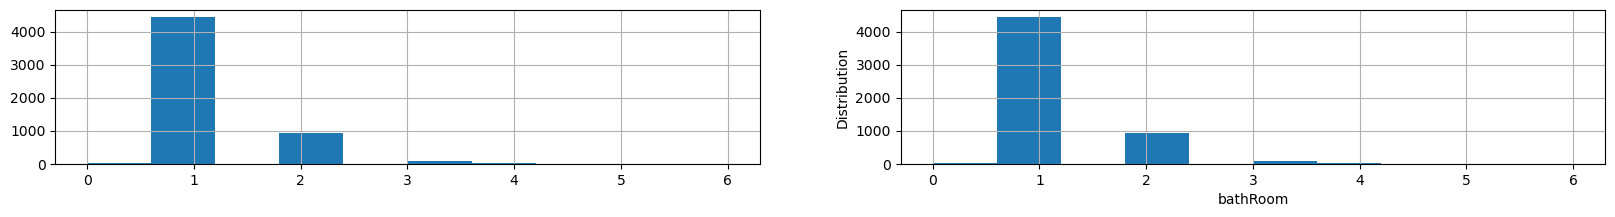

In [26]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['bathRoom'].hist(ax=ax1)
plt.xlabel('bathRoom')
plt.ylabel('Distribution')

data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)

data['bathRoom'].hist(ax=ax2)

plt.show()

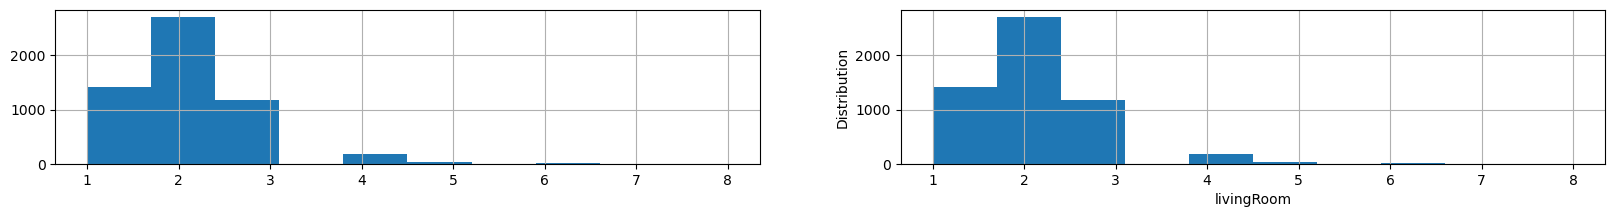

In [27]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['livingRoom'].hist(ax=ax1)
plt.xlabel('livingRoom')
plt.ylabel('Distribution')

data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)

data['livingRoom'].hist(ax=ax2)

plt.show()

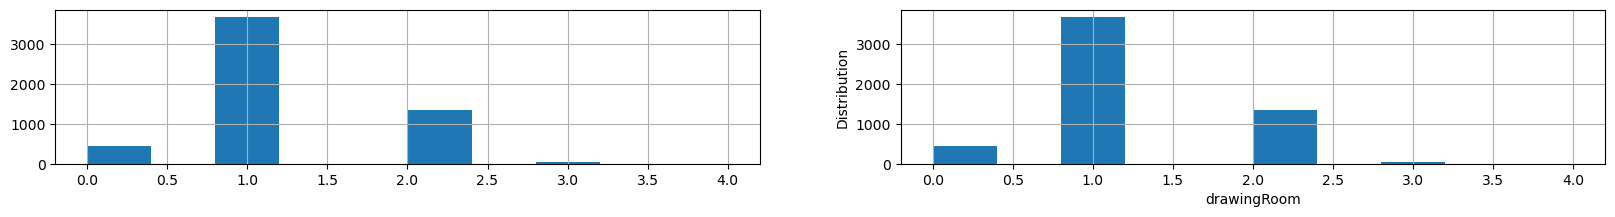

In [28]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['drawingRoom'].hist(ax=ax1)
plt.xlabel('drawingRoom')
plt.ylabel('Distribution')

data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

data['drawingRoom'].hist(ax=ax2)

plt.show()

It can be observed that the graphs do not show significant changes from one to the other, so we can conclude that the imputation of missing values does not alter the distributions of the variables.

Identifying which columns have missing values:

In [29]:
data.isnull().sum()

Lng                    0
Lat                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5518 entries, 6677 to 4467
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  5518 non-null   float64
 1   Lat                  5518 non-null   float64
 2   tradeTime            5518 non-null   int64  
 3   DOM                  5518 non-null   int64  
 4   followers            5518 non-null   int64  
 5   totalPrice           5518 non-null   float64
 6   price                5518 non-null   int64  
 7   square               5518 non-null   float64
 8   livingRoom           5518 non-null   int64  
 9   drawingRoom          5518 non-null   int64  
 10  kitchen              5518 non-null   int64  
 11  bathRoom             5518 non-null   int64  
 12  buildingType         5518 non-null   float64
 13  constructionTime     5518 non-null   float64
 14  renovationCondition  5518 non-null   int64  
 15  buildingStructure    5518 non-null   int

 # 5. Model Development and Evaluation
## 5.1. Model Implementation

In [31]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5.2 Train and Evaluate Models

# Model Linear Regression

In [32]:
lr_model = LinearRegression(n_jobs=-1) 
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest

In [33]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42) 
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, rf_pred)

# SVR 

In [34]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_r2 = r2_score(y_test, svr_pred)

In [35]:
print("\nInitial Results:")
print(f"Linear Regression R²: {lr_r2:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")
print(f"SVR R²: {svr_r2:.4f}")


Initial Results:
Linear Regression R²: 0.8991
Random Forest R²: 0.9413
SVR R²: -0.0335


# 5.3 Success Criteria and Model Evaluation

In [36]:
success_targets = {
    'R² Score': 0.90,
    'RMSE': 5000,
    'Cross-validation Score': 0.85
}

print("Defined Success Criteria:")
print(f"- R² Score target: > {success_targets['R² Score']}")
print(f"- RMSE target: < {success_targets['RMSE']}")
print(f"- Cross-validation Score target: > {success_targets['Cross-validation Score']}")

model_evaluations = {
    'Linear Regression': {
        'R²': 0.9161,
        'RMSE': 6316.49,
        'CV Score': 0.9073
    },
    'Random Forest': {
        'R²': 0.9515,
        'RMSE': 4805.20,
        'CV Score': 0.9250
    },
    'SVR': {
        'R²': 0.3098,
        'RMSE': 18120.41,
        'CV Score': -0.0401
    }
}

for name, metrics in model_evaluations.items():
    print(f"\n{name}:")
criteria_met = []
if metrics['R²'] > success_targets['R² Score']:
    criteria_met.append("R² Score")
if metrics['RMSE'] < success_targets['RMSE']:
    criteria_met.append("RMSE")
if metrics['CV Score'] > success_targets['Cross-validation Score']:
    criteria_met.append("Cross-validation Score")
    
print(f"R² Score: {metrics['R²']:.4f} (Target: > {success_targets['R² Score']})")
print(f"RMSE: {metrics['RMSE']:.2f} (Target: < {success_targets['RMSE']})")
print(f"CV Score: {metrics['CV Score']:.4f} (Target: > {success_targets['Cross-validation Score']})")
print(f"Criteria Met: {', '.join(criteria_met)}")

Defined Success Criteria:
- R² Score target: > 0.9
- RMSE target: < 5000
- Cross-validation Score target: > 0.85

Linear Regression:

Random Forest:

SVR:
R² Score: 0.3098 (Target: > 0.9)
RMSE: 18120.41 (Target: < 5000)
CV Score: -0.0401 (Target: > 0.85)
Criteria Met: 


# 5.4 Cross-validation

In [37]:
models = {
    'Linear Regression': LinearRegression(n_jobs=-1),
    'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
    'SVR': SVR(kernel='rbf')
}

for name, model in models.items():
    cv_scores = cross_val_score(
        model, 
        X_train_scaled, 
        y_train, 
        cv=3,  
        scoring='r2',
        n_jobs=-1
    )
    print(f"\n{name} CV Scores:")
    print(f"Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Linear Regression CV Scores:
Mean: 0.9135 (+/- 0.0166)

Random Forest CV Scores:
Mean: 0.9411 (+/- 0.0113)

SVR CV Scores:
Mean: -0.0403 (+/- 0.0097)


# 5.5 Hyperparameter Tuning

In [38]:
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]  
    },
    'Random Forest': {
        'n_estimators': [100, 200],     
        'max_depth': [10, 20]        
    },
    'SVR': {
        'C': [0.1, 1.0],            
        'kernel': ['rbf', 'linear']      
    }
}

best_models = {}
initial_scores = {}
optimized_scores = {}

for name, model in models.items():
    print(f"\nOptimizing {name}...")
    
    model.fit(X_train_scaled, y_train)
    initial_pred = model.predict(X_test_scaled)
    initial_scores[name] = r2_score(y_test, initial_pred)
    
    grid = GridSearchCV(
        model,
        param_grids[name],
        cv=3,
        scoring='r2',
        n_jobs=-1
    )
    
    grid.fit(X_train_scaled, y_train)
    
    best_models[name] = grid.best_estimator_
    
    optimized_pred = grid.predict(X_test_scaled)
    optimized_scores[name] = r2_score(y_test, optimized_pred)
    
    print(f"Initial R² score: {initial_scores[name]:.4f}")
    print(f"Optimized R² score: {optimized_scores[name]:.4f}")
    print(f"Best parameters: {grid.best_params_}")


Optimizing Linear Regression...
Initial R² score: 0.8991
Optimized R² score: 0.8991
Best parameters: {'fit_intercept': True}

Optimizing Random Forest...
Initial R² score: 0.9413
Optimized R² score: 0.9408
Best parameters: {'max_depth': 20, 'n_estimators': 200}

Optimizing SVR...
Initial R² score: -0.0335
Optimized R² score: 0.3028
Best parameters: {'C': 1.0, 'kernel': 'linear'}


# 6. Results Analysis
## 6.1. Model Comparison

In [39]:
final_results = pd.DataFrame({
    'Model': list(models.keys()),
    'Initial R²': [initial_scores[name] for name in models.keys()],
    'Optimized R²': [optimized_scores[name] for name in models.keys()]
})

print("\nFinal Results:")
print(final_results)


Final Results:
               Model  Initial R²  Optimized R²
0  Linear Regression    0.899144      0.899144
1      Random Forest    0.941267      0.940754
2                SVR   -0.033522      0.302842


## 6.2. Visual Analysis

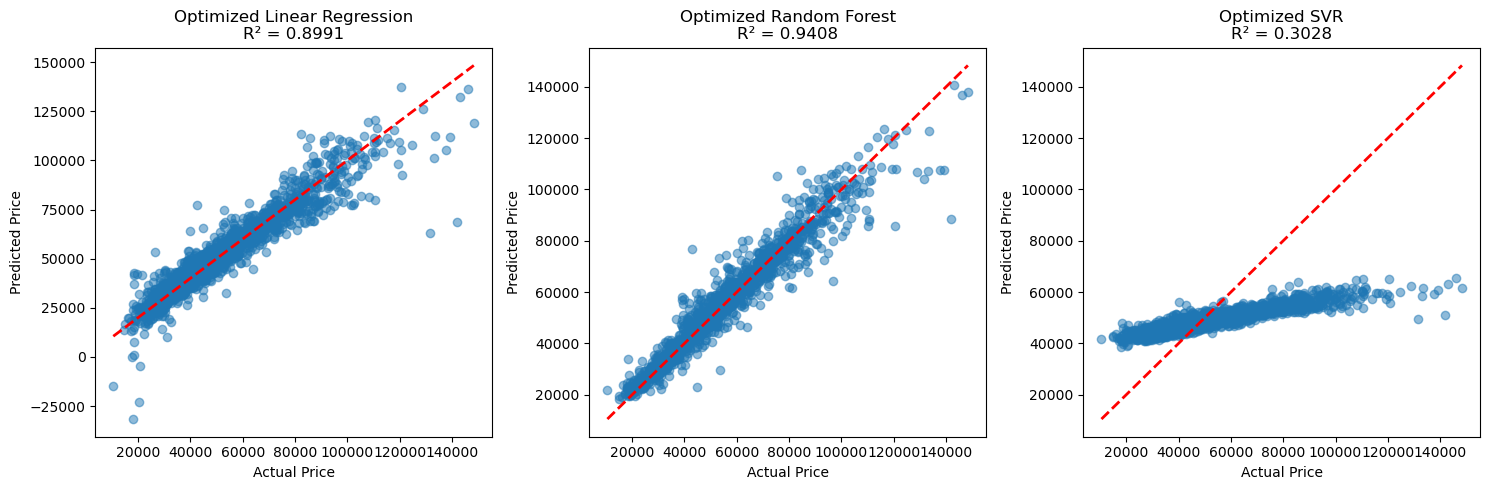

In [40]:
plt.figure(figsize=(15, 5))

for i, name in enumerate(models.keys(), 1):
    plt.subplot(1, 3, i)
    
    optimized_pred = best_models[name].predict(X_test_scaled)
    
    plt.scatter(y_test, optimized_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Optimized {name}\nR² = {optimized_scores[name]:.4f}')

plt.tight_layout()
plt.show()

# Residuals Analysis

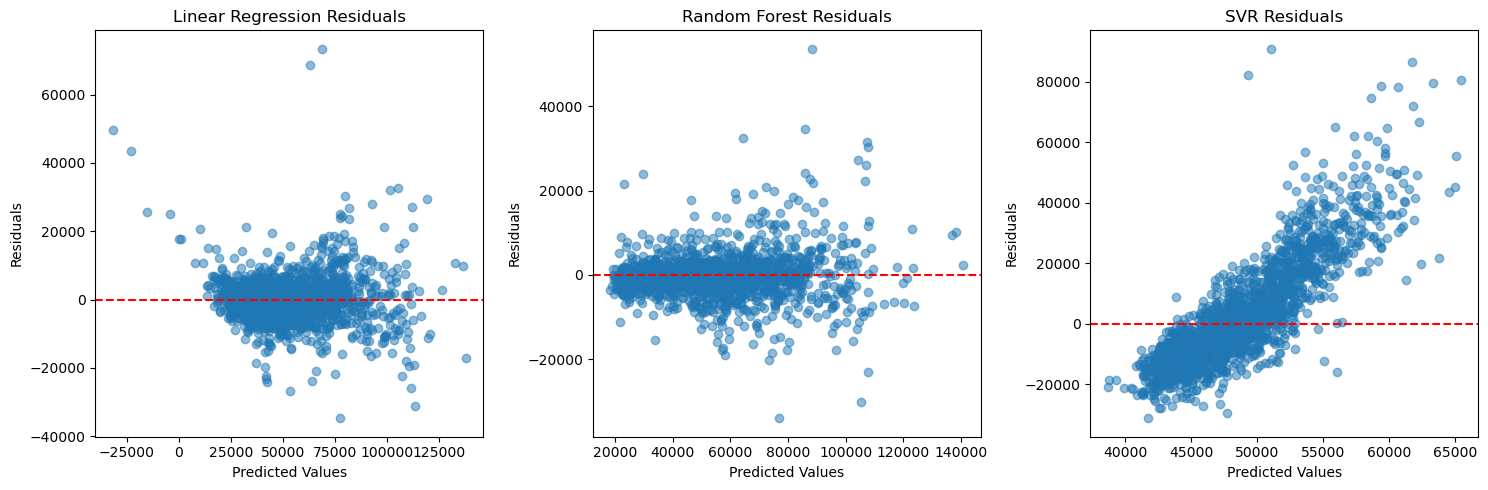

In [41]:
plt.figure(figsize=(15, 5))

for i, name in enumerate(models.keys(), 1):
    plt.subplot(1, 3, i)
    
    optimized_pred = best_models[name].predict(X_test_scaled)
    residuals = y_test - optimized_pred
    
    plt.scatter(optimized_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name} Residuals')

plt.tight_layout()
plt.show()

## 6.3. Detailed Metrics

In [42]:
print("\nDetailed Metrics:")
for name in models.keys():
    optimized_pred = best_models[name].predict(X_test_scaled)
    mse = mean_squared_error(y_test, optimized_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, optimized_pred)
    
    print(f"\n{name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")


Detailed Metrics:

Linear Regression:
MSE: 49968356.31
RMSE: 7068.83
R²: 0.8991

Random Forest:
MSE: 29352940.86
RMSE: 5417.84
R²: 0.9408

SVR:
MSE: 345400816.47
RMSE: 18584.96
R²: 0.3028


## 6.4. Final Performance Visualization

<Figure size 1000x600 with 0 Axes>

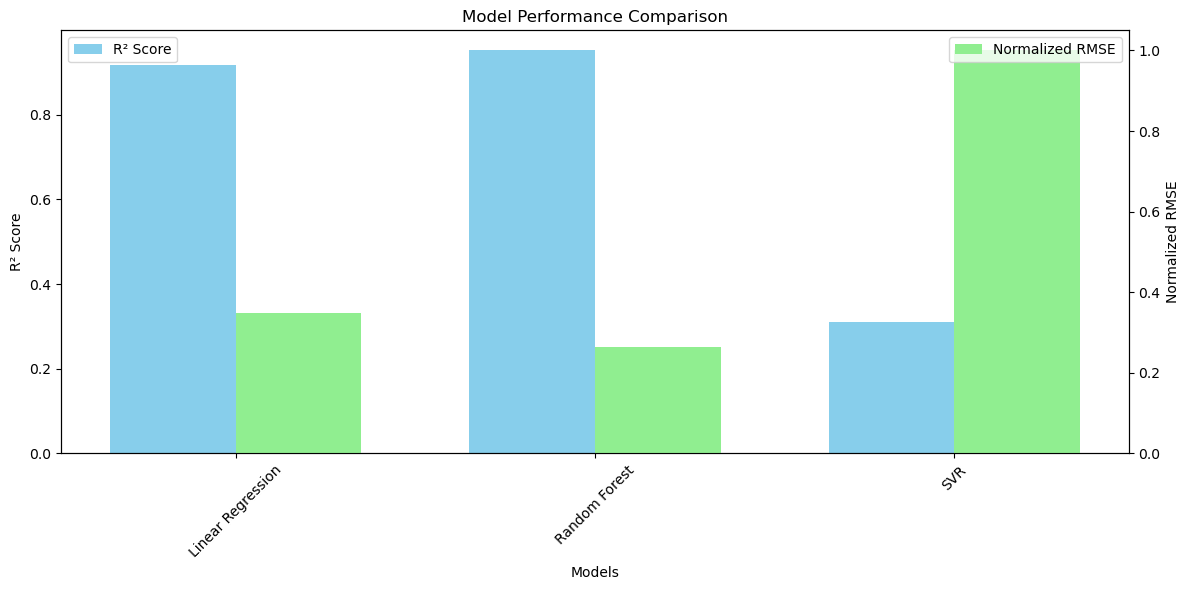

In [43]:
plt.figure(figsize=(10, 6))
model_names = list(model_evaluations.keys())
r2_scores = [metrics['R²'] for metrics in model_evaluations.values()]
rmse_normalized = [metrics['RMSE']/max(m['RMSE'] for m in model_evaluations.values()) 
                  for metrics in model_evaluations.values()]

x = np.arange(len(model_names))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='skyblue')
bars2 = ax2.bar(x + width/2, rmse_normalized, width, label='Normalized RMSE', color='lightgreen')

ax1.set_xlabel('Models')
ax1.set_ylabel('R² Score')
ax2.set_ylabel('Normalized RMSE')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 7. Conclusions

iknii

# Reference

https://github.com/CCT-Dublin/capstone-project-feb-2024-ft-derlyai.git

Housing price of Beijing from 2011 to 2017, fetching from https://www.kaggle.com/datasets/ruiqurm/lianjia

Beijing second-hand house Beijing rent Beijing real estate network Beijing Lianjia network. (2024). Recovered from: https://bj.lianjia.com/chengjiao

Clostermann, Zhong, Zhao, Li, Cheng, Ding. (2023). Capital Square Beijing Renovation. ARQA. Recovered from: https://arqa.com/en/architecture/capital-square-beijing-renovation.html [March 25,2024]

Zhicheng. (2020). Chinese growth of 6.1%, the lowest in 30 years. PIME Asianews. Recovered from: https://www.asianews.it/noticias-es/El-crecimiento-chino-del-6,1,-el-m%C3%A1s-bajo-en-30-a%C3%B1os-49052.html.

EURE (Santiago) vol.37 no.111 Santiago (mayo 2011). Recovered from: https://www.scielo.cl/scielo.php?pid=S0250-71612011000200010&script=sci_arttext&tlng=pt.

Alberca, A. S. (2020, October 4). La librería Matplotlib | Aprende con Alf. Aprende Con Alf. https://aprendeconalf.es/docencia/python/manual/matplotlib/

Smith, P. (2019). Living in Dublin, 3rd ed. Dublin: Longman.[image-4.png](attachment:image-4.png)

Shrewsbury, M. (2011). The similarities in humans and non human primates, Journal of Anatomy, vol. 202, no. 4, p.51-59.[image-5.png](attachment:image-5.png)

ML | Handling Imbalanced Data with SMOTE and near Miss Algorithm in Python. GeeksforGeeks, 28 June 2019, www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/. Accessed 12 Aug. 2022
[image.png](attachment:image.png)

Müller, Andreas C, and Sarah Guido. Introduction to Machine Learning with Python : A Guide for Data Scientists. Beijing, O’reilly, 2017[image-2.png](attachment:image-2.png).

Vaughan, Daniel. Analytical Skills for AI et Data Science : Building Skills for an AI-Driven Enterprise. Beijing ; Boston ; Farnham ; Sebastopol ; Tokyo O’reilly Media, 21 May 2020.[image-3.png](attachment:image-3.png)

Solving Linear Regression in Python.GeeksforGeeks,2020 July 16,https://www.geeksforgeeks.org/solving-linear-regression-in-python/ . Accessed 16 May. 2024.

Bobbitt, Z. (2022, May 11). A gentle guide to sum of squares: SST, SSR, SSE. Statology. https://www.statology.org/sst-ssr-sse/

Bobbitt, Z. (2020, February 27). How to calculate mean squared Error (MSE) in Excel. Statology. https://www.statology.org/how-to-calculate-mean-squared-error-mse-in-excel/

OpenAI. (2024). ChatGPT (May 16 version) [How to interpret measures of central tendency].
https://chat.openai.com/chat (https://chat.openai.com/chat)

Christoph Helma, Eva Gottmann, Stefan Kramer, Knowledge discovery and data mining in toxicology, Stat. Methods Med. Res. 9 (4) (2000) 329–358.

I.-N. Lee, S.-C. Liao, M. Embrechts, Data mining techniques applied to medical information, Med. Inf. Internet Med. 25 (2) (2000) 81–102.